In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.pyplot as plt
import random
from collections import Counter as ct
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data1 = pd.read_csv('gdrive/My Drive/Garuda Indonesia.csv')
data2 = pd.read_csv('gdrive/My Drive/Air Asia.csv')

print(data1)
print(data2)

            Date        Open        High  ...       Close   Adj Close       Volume
0     12/19/2011  421.550995  421.550995  ...  421.550995  421.550995    1747179.0
1     12/20/2011  476.105011  476.105011  ...  476.105011  476.105011  102513458.0
2     12/21/2011  456.266998  486.023010  ...  456.266998  456.266998   54796708.0
3     12/22/2011  456.266998  466.186005  ...  456.266998  456.266998   13488971.0
4     12/23/2011  466.186005  471.144989  ...  466.186005  466.186005   20638998.0
...          ...         ...         ...  ...         ...         ...          ...
1994  12/10/2019  505.000000  525.000000  ...  515.000000  515.000000   31196000.0
1995  12/11/2019  515.000000  525.000000  ...  500.000000  500.000000   25387300.0
1996  12/12/2019  500.000000  515.000000  ...  500.000000  500.000000    8470600.0
1997  12/13/2019  500.000000  510.000000  ...  498.000000  498.000000   21409000.0
1998  12/16/2019  500.000000  510.000000  ...  505.000000  505.000000   14257800.0

[19

In [0]:
data1['Date'] = pd.to_datetime(data1['Date'])
print(data1)

data2['Date'] = pd.to_datetime(data2['Date'])
print(data2)

           Date        Open        High  ...       Close   Adj Close       Volume
0    2011-12-19  421.550995  421.550995  ...  421.550995  421.550995    1747179.0
1    2011-12-20  476.105011  476.105011  ...  476.105011  476.105011  102513458.0
2    2011-12-21  456.266998  486.023010  ...  456.266998  456.266998   54796708.0
3    2011-12-22  456.266998  466.186005  ...  456.266998  456.266998   13488971.0
4    2011-12-23  466.186005  471.144989  ...  466.186005  466.186005   20638998.0
...         ...         ...         ...  ...         ...         ...          ...
1994 2019-12-10  505.000000  525.000000  ...  515.000000  515.000000   31196000.0
1995 2019-12-11  515.000000  525.000000  ...  500.000000  500.000000   25387300.0
1996 2019-12-12  500.000000  515.000000  ...  500.000000  500.000000    8470600.0
1997 2019-12-13  500.000000  510.000000  ...  498.000000  498.000000   21409000.0
1998 2019-12-16  500.000000  510.000000  ...  505.000000  505.000000   14257800.0

[1999 rows x 7 

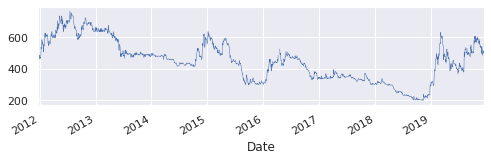

In [0]:
data1 = data1.set_index('Date')
sns.set(rc={'figure.figsize':(8, 2)})
adj_close = data1['Adj Close']
data1.loc['2011': '2019', 'Adj Close'].plot(linewidth=0.5);

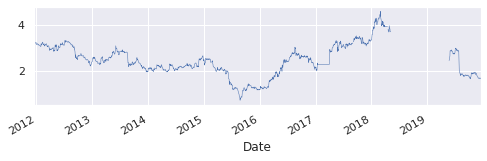

In [0]:
data2 = data2.set_index('Date')
sns.set(rc={'figure.figsize':(8, 2)})
adj_close = data2['Adj Close']
data2.loc['2011': '2019', 'Adj Close'].plot(linewidth=0.5);

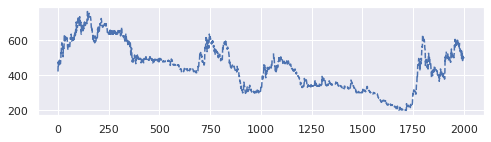

In [6]:
adj_close = data1['Adj Close']

time = np.linspace(1, len(adj_close), len(adj_close))

plt.plot(time, adj_close, label = '2011-2019', ls = '--')


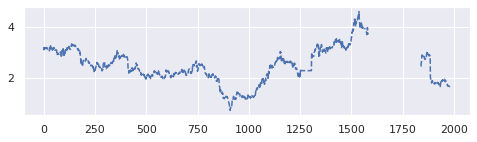

In [7]:
adj_close = data2['Adj Close']

time = np.linspace(1, len(adj_close), len(adj_close))

plt.plot(time, adj_close, label = '2011-2019', ls = '--')

In [8]:
base_data = "Volume"
data_p = 10000000
data1["Prediksi"] = np.where(data1[base_data] >= data_p,"Positive","Negative")
print(data1["Prediksi"])

Date
2011-12-19    Negative
2011-12-20    Positive
2011-12-21    Positive
2011-12-22    Positive
2011-12-23    Positive
                ...   
2019-12-10    Positive
2019-12-11    Positive
2019-12-12    Negative
2019-12-13    Positive
2019-12-16    Positive
Name: Prediksi, Length: 1999, dtype: object


In [11]:
base_data = "Volume"
data_p = 10000000
data2["Prediksi"] = np.where(data2[base_data] >= data_p,"Positive","Negative")
print(data2["Prediksi"])

Date
2011-12-19    Negative
2011-12-20    Negative
2011-12-21    Negative
2011-12-22    Negative
2011-12-23    Negative
                ...   
2019-12-10    Negative
2019-12-11    Negative
2019-12-12    Negative
2019-12-13    Negative
2019-12-16    Negative
Name: Prediksi, Length: 1979, dtype: object


In [13]:
n_o_d = 4
variable_array = ["Open","High","Low","Close"]
variable_array.append("Prediksi")
data1 = data1[variable_array].dropna(axis=0,how='any')
print(data1)

                  Open        High         Low       Close  Prediksi
Date                                                                
2011-12-19  421.550995  421.550995  416.591003  421.550995  Negative
2011-12-20  476.105011  476.105011  421.550995  476.105011  Positive
2011-12-21  456.266998  486.023010  456.266998  456.266998  Positive
2011-12-22  456.266998  466.186005  451.307007  456.266998  Positive
2011-12-23  466.186005  471.144989  456.266998  466.186005  Positive
...                ...         ...         ...         ...       ...
2019-12-10  505.000000  525.000000  500.000000  515.000000  Positive
2019-12-11  515.000000  525.000000  500.000000  500.000000  Positive
2019-12-12  500.000000  515.000000  500.000000  500.000000  Negative
2019-12-13  500.000000  510.000000  496.000000  498.000000  Positive
2019-12-16  500.000000  510.000000  498.000000  505.000000  Positive

[1989 rows x 5 columns]


In [14]:
n_o_d = 4
variable_array = ["Open","High","Low","Close"]
variable_array.append("Prediksi")
data2 = data2[variable_array].dropna(axis=0,how='any')
print(data2)

            Open  High   Low  Close  Prediksi
Date                                         
2011-12-19  3.74  3.74  3.70   3.72  Negative
2011-12-20  3.72  3.72  3.59   3.60  Negative
2011-12-21  3.67  3.70  3.63   3.66  Negative
2011-12-22  3.64  3.70  3.63   3.70  Negative
2011-12-23  3.72  3.73  3.69   3.70  Negative
...          ...   ...   ...    ...       ...
2019-12-10  1.68  1.68  1.65   1.66  Negative
2019-12-11  1.66  1.68  1.64   1.66  Negative
2019-12-12  1.67  1.67  1.65   1.65  Negative
2019-12-13  1.65  1.67  1.64   1.65  Negative
2019-12-16  1.67  1.72  1.65   1.69  Negative

[1725 rows x 5 columns]


In [33]:
train, test = train_test_split(data1, test_size=0.6, random_state=int(4))
gnb = GaussianNB()
newarr1 = []
newarr1.extend(variable_array)
newarr1.remove("Prediksi")

gnb.fit(train[newarr1].values, train["Prediksi"])
result1 = gnb.predict(test[newarr1])

print(result1)

['Positive' 'Positive' 'Negative' ... 'Positive' 'Positive' 'Negative']


In [35]:
train, test = train_test_split(data2, test_size=0.6, random_state=int(4))
gnb = GaussianNB()
newarr2 = []
newarr2.extend(variable_array)
newarr2.remove("Prediksi")

gnb.fit(train[newarr2].values, train["Prediksi"])
result = gnb.predict(test[newarr2])

print(result2)

['Negative' 'Positive' 'Negative' ... 'Negative' 'Negative' 'Negative']


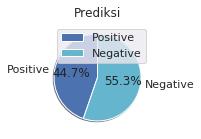

In [34]:
counts = ct(result1)
count_p = counts['Positive']
count_n = counts['Negative']
slices = [count_p,count_n]
cols = ['b','c']
plt.pie(slices, labels=['Positive','Negative'],colors = cols,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Prediksi")
plt.legend()
plt.show()

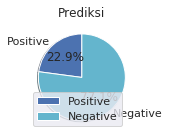

In [36]:
counts = ct(result2)
count_p = counts['Positive']
count_n = counts['Negative']
slices = [count_p,count_n]
cols = ['b','c']
plt.pie(slices, labels=['Positive','Negative'],colors = cols,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Prediksi")
plt.legend()
plt.show()